In [108]:
import numpy as np
from scipy.ndimage import shift
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.ndimage import shift
import skimage.io as io

In [110]:
folder_path = "rectified"
images= []
for filename in os.listdir(folder_path):
     filepath = os.path.join(folder_path, filename)
     image = io.imread(filepath)
     image = image.astype(np.float32) / 255.0
     images.append(image)

In [92]:
len(images)

289

In [74]:
reshaped_image = images.reshape

(800, 1400, 3)

In [78]:
shifted_image = shift(images[0], [100, 0, 0], mode = 'nearest')

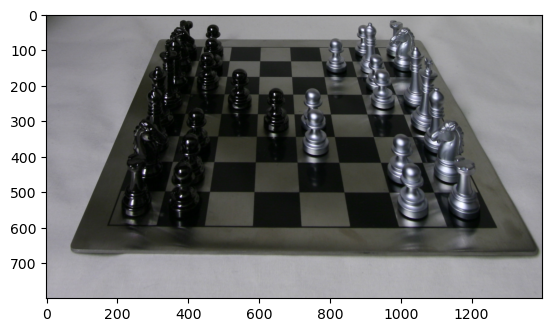

In [111]:
plt.imshow(images[0])

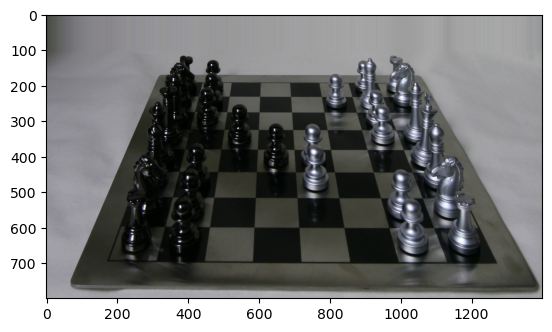

In [79]:
plt.imshow(shifted_image)

In [50]:
images_reshape = images.reshape(17, 17, 800, 1400, 3)

In [26]:
center = (8, 8)
u_values = np.linspace(0, 1, 17) 
v_values = np.linspace(0, 1, 17)  

In [124]:
u_values

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    ])

In [129]:
def refocus_lightfield(images, u_values, v_values, C):
    N = 17
    H, W, C_channels = images[0].shape
    uc, vc = center
    refocused_image = np.zeros_like(images[0], dtype=np.float32)

    for x in range(N):
        for y in range(N):
            uI, vI = u_values[x], v_values[y]
            #print(uI, vI)


            shift_x = C * (x - uc)
            shift_y = C * (y - vc)

            shifted_image = shift(images[x*N + y], [shift_x, shift_y, 0],  order=0)

            refocused_image += shifted_image
            
            print(f"Processed image at ({x}, {y})")
    
    refocused_image /= N * N
    return refocused_image

In [130]:
avg_img = refocus_lightfield(images, u_values, v_values, .5)

Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3

In [134]:
avg_img2 = refocus_lightfield(images, u_values, v_values, -.15)

Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3

(-0.5, 1399.5, 799.5, -0.5)

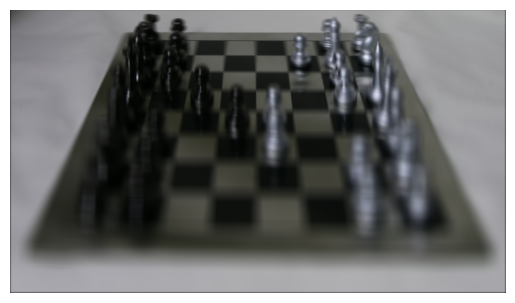

In [137]:
plt.imshow(avg_img)
plt.axis('off')


(-0.5, 1399.5, 799.5, -0.5)

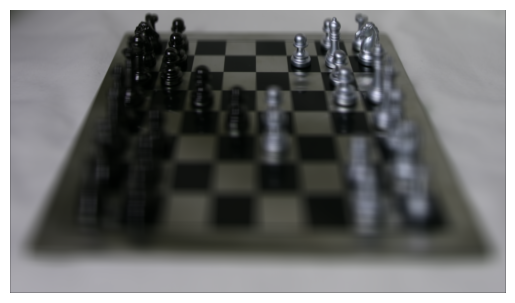

In [138]:
plt.imshow(avg_img2)
plt.axis('off')

In [136]:
refocused_images = []
for scale in np.arange(-0.15, 0.65, 0.05):
    refocused_image = refocus_lightfield(images, u_values, v_values, scale)
    refocused_images.append(refocused_image)
    print(f"Generated refocused image for C = {scale:.2f}")

Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3

Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 

Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4,

Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 11)
Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5

Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 11)
Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5, 1)
Processed image at (5, 2)
Processed image at (5, 3)
Processed image at (5, 4)
Processed image at (5, 5)
Processed image at (5, 6)
Processed image at (5, 7)
Processed image at (5, 8)
Processed image at (5, 9)
Processed image at (5, 10)
Processed image at (5, 11)
Processed image at (5, 12)
Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5

Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5, 1)
Processed image at (5, 2)
Processed image at (5, 3)
Processed image at (5, 4)
Processed image at (5, 5)
Processed image at (5, 6)
Processed image at (5, 7)
Processed image at (5, 8)
Processed image at (5, 9)
Processed image at (5, 10)
Processed image at (5, 11)
Processed image at (5, 12)
Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5, 16)
Processed image at (6, 0)
Processed image at (6, 1)
Processed image at (6, 2)
Processed image at (6, 3)
Processed image at (6, 4)
Processed image at (6, 5)
Processed image at (6, 6)
Processed image at (6, 7)
Processed image at (6, 8)
Processed image at (6, 9)
Processed image at (6, 10)
Processed image at (6, 11)
Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6

Processed image at (5, 11)
Processed image at (5, 12)
Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5, 16)
Processed image at (6, 0)
Processed image at (6, 1)
Processed image at (6, 2)
Processed image at (6, 3)
Processed image at (6, 4)
Processed image at (6, 5)
Processed image at (6, 6)
Processed image at (6, 7)
Processed image at (6, 8)
Processed image at (6, 9)
Processed image at (6, 10)
Processed image at (6, 11)
Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6, 15)
Processed image at (6, 16)
Processed image at (7, 0)
Processed image at (7, 1)
Processed image at (7, 2)
Processed image at (7, 3)
Processed image at (7, 4)
Processed image at (7, 5)
Processed image at (7, 6)
Processed image at (7, 7)
Processed image at (7, 8)
Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7

Processed image at (6, 10)
Processed image at (6, 11)
Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6, 15)
Processed image at (6, 16)
Processed image at (7, 0)
Processed image at (7, 1)
Processed image at (7, 2)
Processed image at (7, 3)
Processed image at (7, 4)
Processed image at (7, 5)
Processed image at (7, 6)
Processed image at (7, 7)
Processed image at (7, 8)
Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7, 16)
Processed image at (8, 0)
Processed image at (8, 1)
Processed image at (8, 2)
Processed image at (8, 3)
Processed image at (8, 4)
Processed image at (8, 5)
Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8

Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7, 16)
Processed image at (8, 0)
Processed image at (8, 1)
Processed image at (8, 2)
Processed image at (8, 3)
Processed image at (8, 4)
Processed image at (8, 5)
Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9,

Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed 

Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11,

Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed imag

Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed imag

Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed imag

Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed imag

Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed image at (15, 6)
Processed image at (15, 7)
Processed image at (15, 8)
Processed image at (15, 9)
Processed image at (15, 10)
Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed ima

In [139]:
import imageio.v2 as imageio 
gif_filename = "depth_refocus_-.15_to_.65.gif"
imageio.mimsave(gif_filename, refocused_images, duration=0.1) 

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Part 2

In [144]:
def aperature_adjustment(images, u_values, v_values, C, r):
    N = 17
    H, W, C_channels = images[0].shape
    uc, vc = center
    refocused_image = np.zeros_like(images[0], dtype=np.float32)
    count = 0

    for x in range(N):
        for y in range(N):
            dist = np.sqrt((x - uc)**2 + (y - vc)**2)
            
            if dist <= r:
                shift_x = C * (x - uc)
                shift_y = C * (y - vc)

                shifted_image = shift(images[x*N + y], [shift_x, shift_y, 0],  order=0)

                refocused_image += shifted_image
                count += 1
            print(f"Processed image at ({x}, {y})")

    if count > 0:
        refocused_image /= count
    return refocused_image

In [145]:
ap_avg_img = aperature_adjustment(images, u_values, v_values, .5, 2)

Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3

In [147]:
ap_avg_img2 = aperature_adjustment(images, u_values, v_values, .5, 8)

Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3

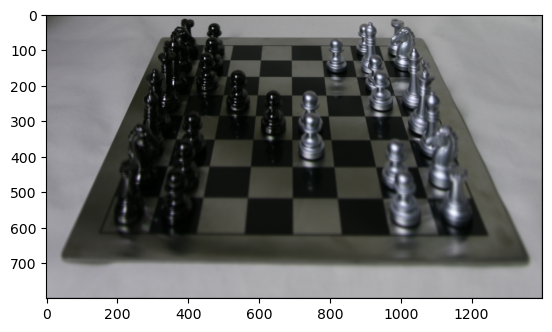

In [146]:
plt.imshow(ap_avg_img)
plt.axis('off')

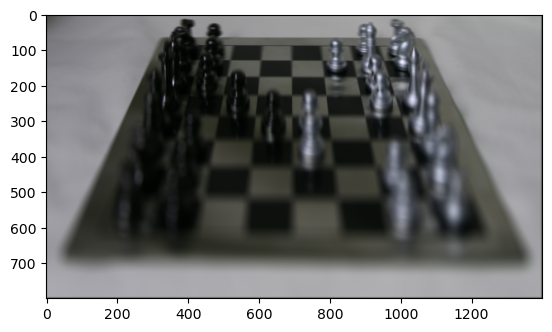

In [148]:
plt.imshow(ap_avg_img2)
plt.axis('off')

In [149]:
refocused_images = []
for r in np.arange(0 ,60):
    refocused_image = aperature_adjustment(images, u_values, v_values, .2, r)
    refocused_images.append(refocused_image)
    print(f"Generated refocused image for r = {r:.2f}")

Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3

Processed image at (7, 8)
Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7, 16)
Processed image at (8, 0)
Processed image at (8, 1)
Processed image at (8, 2)
Processed image at (8, 3)
Processed image at (8, 4)
Processed image at (8, 5)
Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 

Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed im

Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11,

Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed imag

Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed imag

Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed imag

Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed imag

Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed image at (15, 6)
Processed image at (15, 7)
Processed image at (15, 8)
Processed image at (15, 9)
Processed image at (15, 10)
Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed image at (16, 1)
Processed image at (16, 2)
Processed image at (16, 3)
Processed image at (16, 4)
Processed imag

Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed image at (15, 6)
Processed image at (15, 7)
Processed image at (15, 8)
Processed image at (15, 9)
Processed image at (15, 10)
Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed image at (16, 1)
Processed image at (16, 2)
Processed image at (16, 3)
Processed image at (16, 4)
Processed image at (16, 5)
Processed image at (16, 6)
Processed image at (16, 7)
Processed image at (16, 8)
Processed image at (16, 9)
Processed image at (16, 10)
Processed image at (16, 11)
Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed image at (16, 15)
Processed image at (16, 16)
Generated refocused image for r = 9.00
Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Proces

Processed image at (16, 2)
Processed image at (16, 3)
Processed image at (16, 4)
Processed image at (16, 5)
Processed image at (16, 6)
Processed image at (16, 7)
Processed image at (16, 8)
Processed image at (16, 9)
Processed image at (16, 10)
Processed image at (16, 11)
Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed image at (16, 15)
Processed image at (16, 16)
Generated refocused image for r = 10.00
Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1

Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3

Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3

Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 

Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 11)
Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5,

Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 11)
Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5, 1)
Processed image at (5, 2)
Processed image at (5, 3)
Processed image at (5, 4)
Processed image at (5, 5)
Processed image at (5, 6)
Processed image at (5, 7)
Processed image at (5, 8)
Processed image at (5, 9)
Processed image at (5, 10)
Processed image at (5, 11)
Processed image at (5, 12)
Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5, 16)
Processed image at (6

Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5, 1)
Processed image at (5, 2)
Processed image at (5, 3)
Processed image at (5, 4)
Processed image at (5, 5)
Processed image at (5, 6)
Processed image at (5, 7)
Processed image at (5, 8)
Processed image at (5, 9)
Processed image at (5, 10)
Processed image at (5, 11)
Processed image at (5, 12)
Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5, 16)
Processed image at (6, 0)
Processed image at (6, 1)
Processed image at (6, 2)
Processed image at (6, 3)
Processed image at (6, 4)
Processed image at (6, 5)
Processed image at (6, 6)
Processed image at (6, 7)
Processed image at (6, 8)
Processed image at (6, 9)
Processed image at (6, 10)
Processed image at (6, 11)
Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6, 15)
Processed image at (6, 16)
Processed image at (7

Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5, 16)
Processed image at (6, 0)
Processed image at (6, 1)
Processed image at (6, 2)
Processed image at (6, 3)
Processed image at (6, 4)
Processed image at (6, 5)
Processed image at (6, 6)
Processed image at (6, 7)
Processed image at (6, 8)
Processed image at (6, 9)
Processed image at (6, 10)
Processed image at (6, 11)
Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6, 15)
Processed image at (6, 16)
Processed image at (7, 0)
Processed image at (7, 1)
Processed image at (7, 2)
Processed image at (7, 3)
Processed image at (7, 4)
Processed image at (7, 5)
Processed image at (7, 6)
Processed image at (7, 7)
Processed image at (7, 8)
Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7

Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6, 15)
Processed image at (6, 16)
Processed image at (7, 0)
Processed image at (7, 1)
Processed image at (7, 2)
Processed image at (7, 3)
Processed image at (7, 4)
Processed image at (7, 5)
Processed image at (7, 6)
Processed image at (7, 7)
Processed image at (7, 8)
Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7, 16)
Processed image at (8, 0)
Processed image at (8, 1)
Processed image at (8, 2)
Processed image at (8, 3)
Processed image at (8, 4)
Processed image at (8, 5)
Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8

Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7, 16)
Processed image at (8, 0)
Processed image at (8, 1)
Processed image at (8, 2)
Processed image at (8, 3)
Processed image at (8, 4)
Processed image at (8, 5)
Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9

Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processe

Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (1

Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed imag

Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed imag

Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed imag

Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed imag

Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed image at (15, 6)
Processed image at (15, 7)
Processed image at (15, 8)
Processed image at (15, 9)
Processed image at (15, 10)
Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed image at (16, 1)
Processed imag

Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed image at (15, 6)
Processed image at (15, 7)
Processed image at (15, 8)
Processed image at (15, 9)
Processed image at (15, 10)
Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed image at (16, 1)
Processed image at (16, 2)
Processed image at (16, 3)
Processed image at (16, 4)
Processed image at (16, 5)
Processed image at (16, 6)
Processed image at (16, 7)
Processed image at (16, 8)
Processed image at (16, 9)
Processed image at (16, 10)
Processed image at (16, 11)
Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed image at (16, 15)
Processed image at (16, 16)
Generated refocused image for r = 28.00


Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed image at (16, 1)
Processed image at (16, 2)
Processed image at (16, 3)
Processed image at (16, 4)
Processed image at (16, 5)
Processed image at (16, 6)
Processed image at (16, 7)
Processed image at (16, 8)
Processed image at (16, 9)
Processed image at (16, 10)
Processed image at (16, 11)
Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed image at (16, 15)
Processed image at (16, 16)
Generated refocused image for r = 29.00
Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image

Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed image at (16, 15)
Processed image at (16, 16)
Generated refocused image for r = 30.00
Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Pro

Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2,

Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 

Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 

Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 11)
Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5, 1)
Processed image at (5, 2)
Processed image at (5, 3)
Processed image at (5, 4)
Processed image at (5, 5)
Processed image at (5, 6)
Processed image at (5, 7)
Processed image at (5, 8)
Processed image at (5, 9)
Processed image at (5, 10)
Processed image at (5, 

Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 11)
Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5, 1)
Processed image at (5, 2)
Processed image at (5, 3)
Processed image at (5, 4)
Processed image at (5, 5)
Processed image at (5, 6)
Processed image at (5, 7)
Processed image at (5, 8)
Processed image at (5, 9)
Processed image at (5, 10)
Processed image at (5, 11)
Processed image at (5, 12)
Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5, 16)
Processed image at (6, 0)
Processed image at (6, 1)
Processed image at (6, 2)
Processed image at (6, 3)
Processed image at (6, 4)
Processed image at (6, 5)
Processed image at (6, 6)
Processed image at (6, 7)
Processed image at (6, 8)
Processed image at (6, 9)
Processed image at (6, 1

Processed image at (5, 6)
Processed image at (5, 7)
Processed image at (5, 8)
Processed image at (5, 9)
Processed image at (5, 10)
Processed image at (5, 11)
Processed image at (5, 12)
Processed image at (5, 13)
Processed image at (5, 14)
Processed image at (5, 15)
Processed image at (5, 16)
Processed image at (6, 0)
Processed image at (6, 1)
Processed image at (6, 2)
Processed image at (6, 3)
Processed image at (6, 4)
Processed image at (6, 5)
Processed image at (6, 6)
Processed image at (6, 7)
Processed image at (6, 8)
Processed image at (6, 9)
Processed image at (6, 10)
Processed image at (6, 11)
Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6, 15)
Processed image at (6, 16)
Processed image at (7, 0)
Processed image at (7, 1)
Processed image at (7, 2)
Processed image at (7, 3)
Processed image at (7, 4)
Processed image at (7, 5)
Processed image at (7, 6)
Processed image at (7, 7)
Processed image at (7, 8)
Processed image at (7, 9

Processed image at (6, 6)
Processed image at (6, 7)
Processed image at (6, 8)
Processed image at (6, 9)
Processed image at (6, 10)
Processed image at (6, 11)
Processed image at (6, 12)
Processed image at (6, 13)
Processed image at (6, 14)
Processed image at (6, 15)
Processed image at (6, 16)
Processed image at (7, 0)
Processed image at (7, 1)
Processed image at (7, 2)
Processed image at (7, 3)
Processed image at (7, 4)
Processed image at (7, 5)
Processed image at (7, 6)
Processed image at (7, 7)
Processed image at (7, 8)
Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7, 16)
Processed image at (8, 0)
Processed image at (8, 1)
Processed image at (8, 2)
Processed image at (8, 3)
Processed image at (8, 4)
Processed image at (8, 5)
Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9

Processed image at (7, 6)
Processed image at (7, 7)
Processed image at (7, 8)
Processed image at (7, 9)
Processed image at (7, 10)
Processed image at (7, 11)
Processed image at (7, 12)
Processed image at (7, 13)
Processed image at (7, 14)
Processed image at (7, 15)
Processed image at (7, 16)
Processed image at (8, 0)
Processed image at (8, 1)
Processed image at (8, 2)
Processed image at (8, 3)
Processed image at (8, 4)
Processed image at (8, 5)
Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9

Processed image at (8, 6)
Processed image at (8, 7)
Processed image at (8, 8)
Processed image at (8, 9)
Processed image at (8, 10)
Processed image at (8, 11)
Processed image at (8, 12)
Processed image at (8, 13)
Processed image at (8, 14)
Processed image at (8, 15)
Processed image at (8, 16)
Processed image at (9, 0)
Processed image at (9, 1)
Processed image at (9, 2)
Processed image at (9, 3)
Processed image at (9, 4)
Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image

Processed image at (9, 5)
Processed image at (9, 6)
Processed image at (9, 7)
Processed image at (9, 8)
Processed image at (9, 9)
Processed image at (9, 10)
Processed image at (9, 11)
Processed image at (9, 12)
Processed image at (9, 13)
Processed image at (9, 14)
Processed image at (9, 15)
Processed image at (9, 16)
Processed image at (10, 0)
Processed image at (10, 1)
Processed image at (10, 2)
Processed image at (10, 3)
Processed image at (10, 4)
Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)

Processed image at (10, 5)
Processed image at (10, 6)
Processed image at (10, 7)
Processed image at (10, 8)
Processed image at (10, 9)
Processed image at (10, 10)
Processed image at (10, 11)
Processed image at (10, 12)
Processed image at (10, 13)
Processed image at (10, 14)
Processed image at (10, 15)
Processed image at (10, 16)
Processed image at (11, 0)
Processed image at (11, 1)
Processed image at (11, 2)
Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed imag

Processed image at (11, 3)
Processed image at (11, 4)
Processed image at (11, 5)
Processed image at (11, 6)
Processed image at (11, 7)
Processed image at (11, 8)
Processed image at (11, 9)
Processed image at (11, 10)
Processed image at (11, 11)
Processed image at (11, 12)
Processed image at (11, 13)
Processed image at (11, 14)
Processed image at (11, 15)
Processed image at (11, 16)
Processed image at (12, 0)
Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed imag

Processed image at (12, 1)
Processed image at (12, 2)
Processed image at (12, 3)
Processed image at (12, 4)
Processed image at (12, 5)
Processed image at (12, 6)
Processed image at (12, 7)
Processed image at (12, 8)
Processed image at (12, 9)
Processed image at (12, 10)
Processed image at (12, 11)
Processed image at (12, 12)
Processed image at (12, 13)
Processed image at (12, 14)
Processed image at (12, 15)
Processed image at (12, 16)
Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed imag

Processed image at (13, 0)
Processed image at (13, 1)
Processed image at (13, 2)
Processed image at (13, 3)
Processed image at (13, 4)
Processed image at (13, 5)
Processed image at (13, 6)
Processed image at (13, 7)
Processed image at (13, 8)
Processed image at (13, 9)
Processed image at (13, 10)
Processed image at (13, 11)
Processed image at (13, 12)
Processed image at (13, 13)
Processed image at (13, 14)
Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed imag

Processed image at (13, 15)
Processed image at (13, 16)
Processed image at (14, 0)
Processed image at (14, 1)
Processed image at (14, 2)
Processed image at (14, 3)
Processed image at (14, 4)
Processed image at (14, 5)
Processed image at (14, 6)
Processed image at (14, 7)
Processed image at (14, 8)
Processed image at (14, 9)
Processed image at (14, 10)
Processed image at (14, 11)
Processed image at (14, 12)
Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed image at (15, 6)
Processed image at (15, 7)
Processed image at (15, 8)
Processed image at (15, 9)
Processed image at (15, 10)
Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed im

Processed image at (14, 13)
Processed image at (14, 14)
Processed image at (14, 15)
Processed image at (14, 16)
Processed image at (15, 0)
Processed image at (15, 1)
Processed image at (15, 2)
Processed image at (15, 3)
Processed image at (15, 4)
Processed image at (15, 5)
Processed image at (15, 6)
Processed image at (15, 7)
Processed image at (15, 8)
Processed image at (15, 9)
Processed image at (15, 10)
Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed image at (16, 1)
Processed image at (16, 2)
Processed image at (16, 3)
Processed image at (16, 4)
Processed image at (16, 5)
Processed image at (16, 6)
Processed image at (16, 7)
Processed image at (16, 8)
Processed image at (16, 9)
Processed image at (16, 10)
Processed image at (16, 11)
Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed im

Processed image at (15, 11)
Processed image at (15, 12)
Processed image at (15, 13)
Processed image at (15, 14)
Processed image at (15, 15)
Processed image at (15, 16)
Processed image at (16, 0)
Processed image at (16, 1)
Processed image at (16, 2)
Processed image at (16, 3)
Processed image at (16, 4)
Processed image at (16, 5)
Processed image at (16, 6)
Processed image at (16, 7)
Processed image at (16, 8)
Processed image at (16, 9)
Processed image at (16, 10)
Processed image at (16, 11)
Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed image at (16, 15)
Processed image at (16, 16)
Generated refocused image for r = 48.00
Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed im

Processed image at (16, 9)
Processed image at (16, 10)
Processed image at (16, 11)
Processed image at (16, 12)
Processed image at (16, 13)
Processed image at (16, 14)
Processed image at (16, 15)
Processed image at (16, 16)
Generated refocused image for r = 49.00
Processed image at (0, 0)
Processed image at (0, 1)
Processed image at (0, 2)
Processed image at (0, 3)
Processed image at (0, 4)
Processed image at (0, 5)
Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
P

Processed image at (0, 6)
Processed image at (0, 7)
Processed image at (0, 8)
Processed image at (0, 9)
Processed image at (0, 10)
Processed image at (0, 11)
Processed image at (0, 12)
Processed image at (0, 13)
Processed image at (0, 14)
Processed image at (0, 15)
Processed image at (0, 16)
Processed image at (1, 0)
Processed image at (1, 1)
Processed image at (1, 2)
Processed image at (1, 3)
Processed image at (1, 4)
Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9

Processed image at (1, 5)
Processed image at (1, 6)
Processed image at (1, 7)
Processed image at (1, 8)
Processed image at (1, 9)
Processed image at (1, 10)
Processed image at (1, 11)
Processed image at (1, 12)
Processed image at (1, 13)
Processed image at (1, 14)
Processed image at (1, 15)
Processed image at (1, 16)
Processed image at (2, 0)
Processed image at (2, 1)
Processed image at (2, 2)
Processed image at (2, 3)
Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8

Processed image at (2, 4)
Processed image at (2, 5)
Processed image at (2, 6)
Processed image at (2, 7)
Processed image at (2, 8)
Processed image at (2, 9)
Processed image at (2, 10)
Processed image at (2, 11)
Processed image at (2, 12)
Processed image at (2, 13)
Processed image at (2, 14)
Processed image at (2, 15)
Processed image at (2, 16)
Processed image at (3, 0)
Processed image at (3, 1)
Processed image at (3, 2)
Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7

Processed image at (3, 3)
Processed image at (3, 4)
Processed image at (3, 5)
Processed image at (3, 6)
Processed image at (3, 7)
Processed image at (3, 8)
Processed image at (3, 9)
Processed image at (3, 10)
Processed image at (3, 11)
Processed image at (3, 12)
Processed image at (3, 13)
Processed image at (3, 14)
Processed image at (3, 15)
Processed image at (3, 16)
Processed image at (4, 0)
Processed image at (4, 1)
Processed image at (4, 2)
Processed image at (4, 3)
Processed image at (4, 4)
Processed image at (4, 5)
Processed image at (4, 6)
Processed image at (4, 7)
Processed image at (4, 8)
Processed image at (4, 9)
Processed image at (4, 10)
Processed image at (4, 11)
Processed image at (4, 12)
Processed image at (4, 13)
Processed image at (4, 14)
Processed image at (4, 15)
Processed image at (4, 16)
Processed image at (5, 0)
Processed image at (5, 1)
Processed image at (5, 2)
Processed image at (5, 3)
Processed image at (5, 4)
Processed image at (5, 5)
Processed image at (5, 6

KeyboardInterrupt: 

In [150]:
import imageio.v2 as imageio 
gif_filename = "aperature_refocus_0_to_60.gif"
imageio.mimsave(gif_filename, refocused_images, duration=0.1) 

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0